# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
df = pd.read_csv("ionosphere_data.csv")

In [2]:
df.shape

(351, 35)

In [3]:
df.isnull().sum()   #### There is no any null value in each column.

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

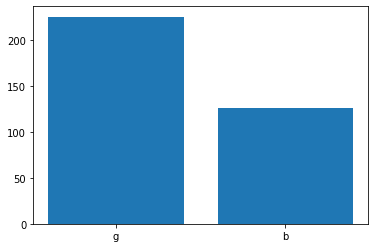

In [4]:
counts = df["label"].value_counts()   ### we see that data is imbalance. No: of 'g' is higher.
plt.bar(counts.index, counts.values)
plt.show()

In [5]:
(df.feature2 == 0).sum() ### all values of the column feature2 are zeros. No variation, so drop it.
df = df.drop(columns = "feature2",axis =1)

In [6]:
df["label"]=df["label"].replace({"g":1,"b":0})   ### i replaced "g" with 1 and "b" with 0


In [7]:
df[["feature1","label"]]=df[["feature1","label"]].astype("float64")  ## Now the data is clean and converted to float type

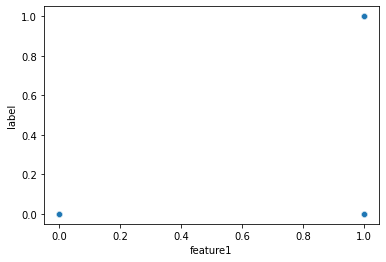

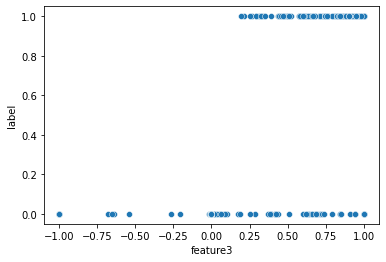

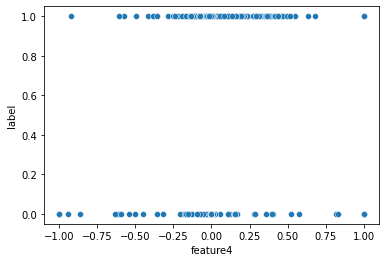

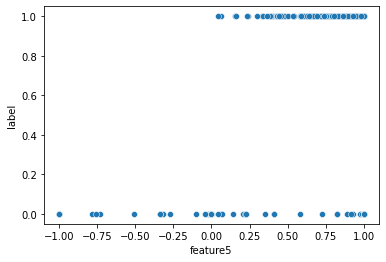

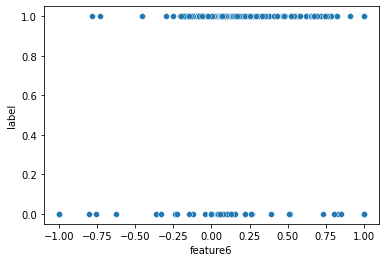

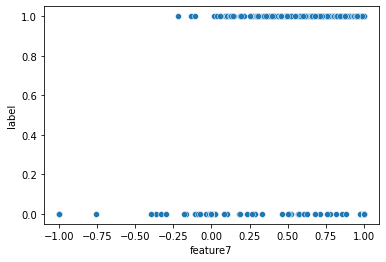

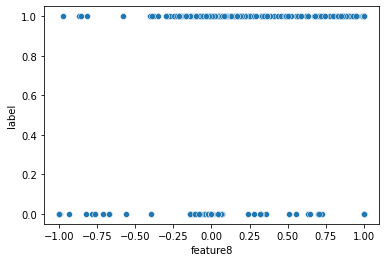

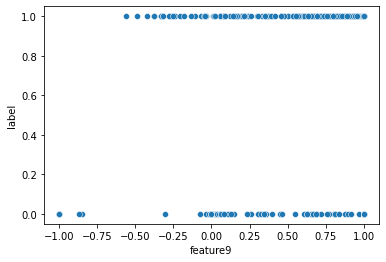

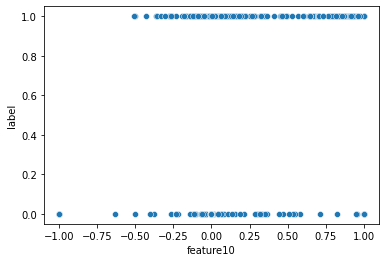

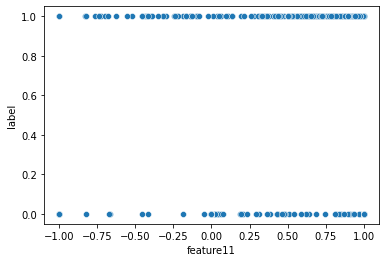

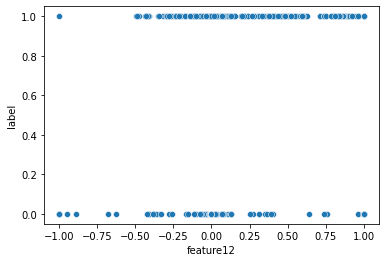

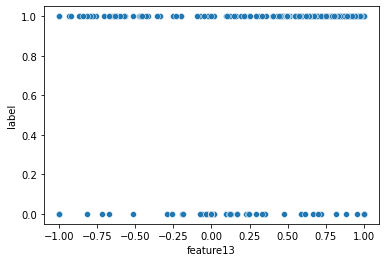

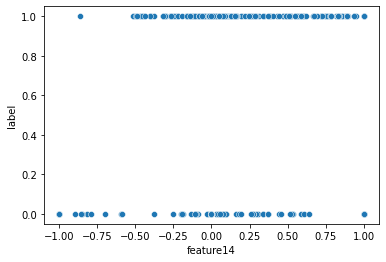

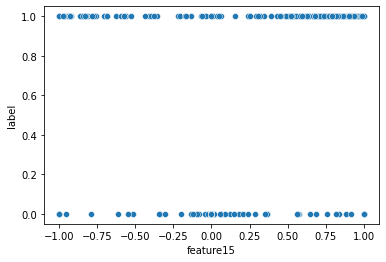

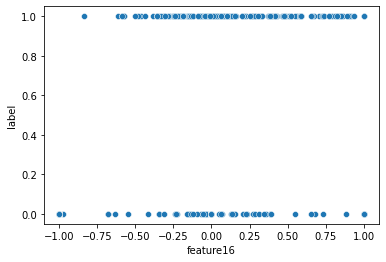

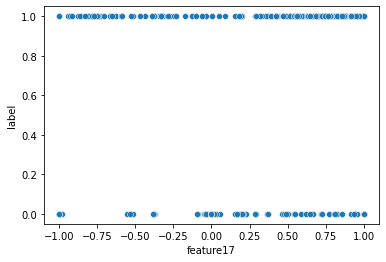

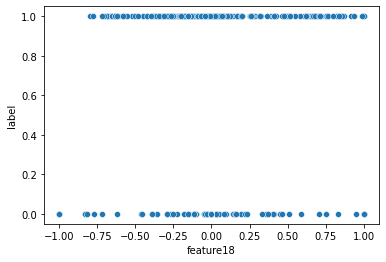

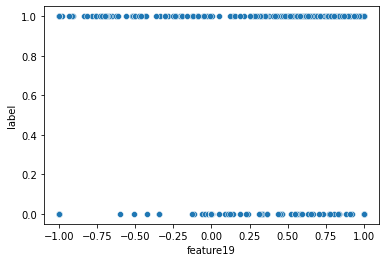

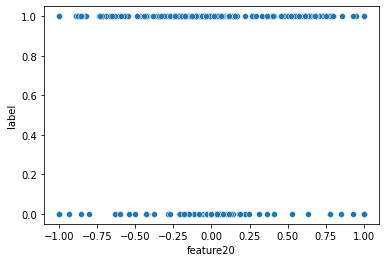

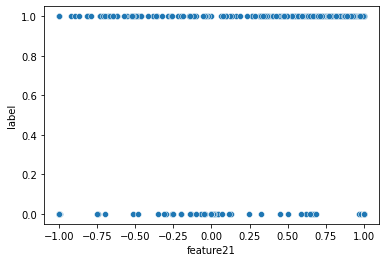

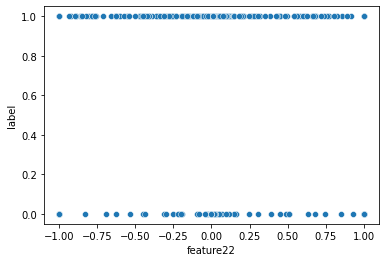

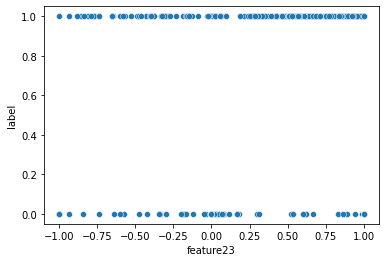

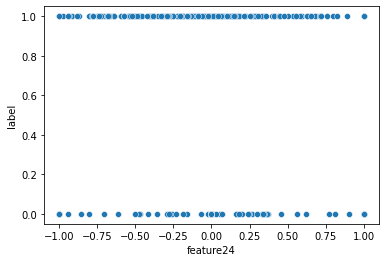

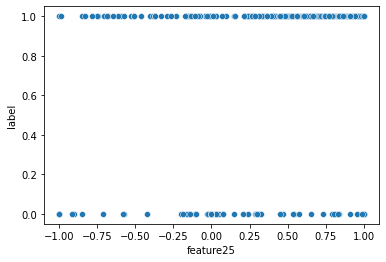

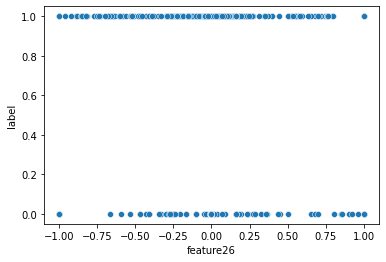

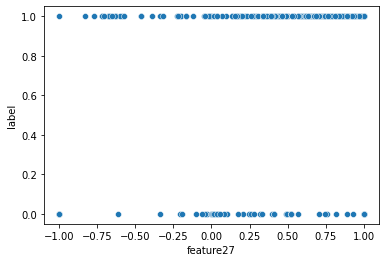

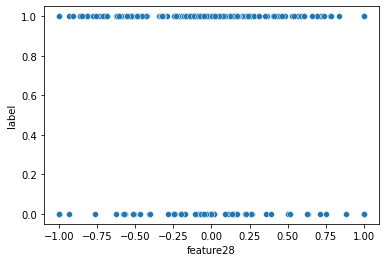

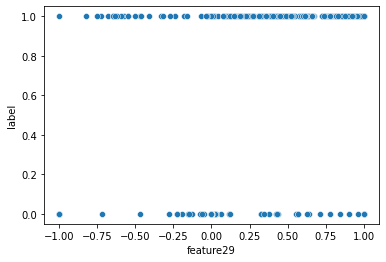

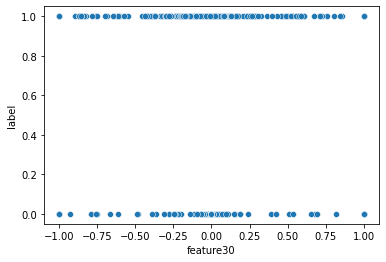

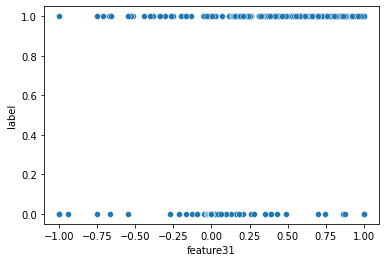

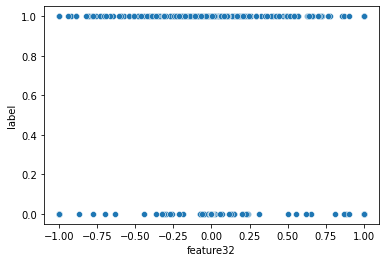

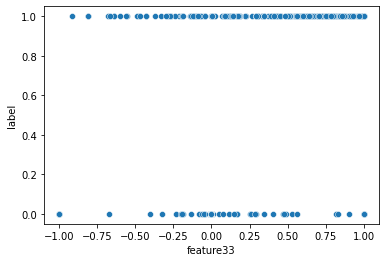

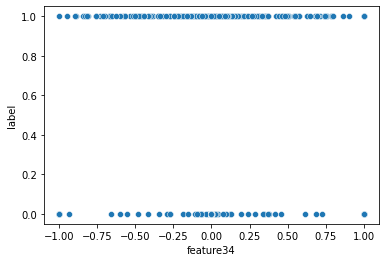

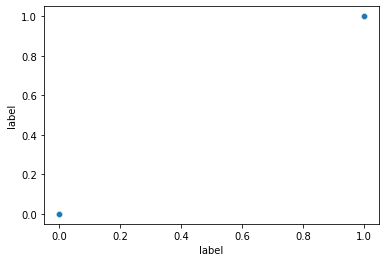

In [8]:
import seaborn as sns                        ### All the values of features are between 0 and 1. 
                                              #Outliers are not present.
for x in df:
    sns.scatterplot(x=df[x],y=df['label'])
    plt.show()

In [9]:
print(df["label"].value_counts())

1.0    225
0.0    126
Name: label, dtype: int64


In [10]:
good = df[df['label']==1.]
bad = df[df["label"]==0.]
print(good.shape)
print(bad.shape)

(225, 34)
(126, 34)


In [11]:
good_1 = good.sample(bad.shape[0])

In [12]:
bad.shape,good_1.shape                          #### Now both having same shape

((126, 34), (126, 34))

In [13]:
final_data = bad.append(good_1,ignore_index=True)
final_data.shape

(252, 34)

In [14]:
x_train=final_data.drop("label",axis=1)
y_labels=final_data["label"]
x_train=np.array(x_train)
y_labels = np.array(y_labels)

In [15]:
x_train.shape, y_labels.shape

((252, 33), (252,))

In [16]:
### Split into 60% and 40% ratio.

# Produces test split.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_labels, test_size=0.4, random_state =2,shuffle = True)


In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(151, 33)
(151,)
(101, 33)
(101,)


In [18]:
mean = x_train.mean(axis = 0)
x_train = x_train- mean
std = x_train.std(axis =0) + 0.000000001                          
x_train /= std           # normalizing train data   

x_test -= mean          # normalizing test data
x_test /= std

In [19]:
'''
Model : 1 hidden layers including 16 unit.
Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
'''
import tensorflow as tf
from keras import regularizers

def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1], )),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  optimizer = tf.keras.optimizers

  model.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
  return model

In [20]:
### 6.Train the Model with Epochs (100).
all_scores =[]
all_mae_histories = []

num_epochs =16

model = build_model()
history =model.fit(x_train, y_train, batch_size=10,validation_split=0.2,
                   epochs=num_epochs, verbose=1)

Epoch 1/16
12/12 [==============================] - 1s 45ms/step - loss: 0.7048 - accuracy: 0.4141 - val_loss: 0.5900 - val_accuracy: 0.7419
Epoch 2/16
12/12 [==============================] - 0s 5ms/step - loss: 0.6159 - accuracy: 0.6931 - val_loss: 0.5345 - val_accuracy: 0.7742
Epoch 3/16
12/12 [==============================] - 0s 5ms/step - loss: 0.5703 - accuracy: 0.7719 - val_loss: 0.4925 - val_accuracy: 0.8065
Epoch 4/16
12/12 [==============================] - 0s 5ms/step - loss: 0.5383 - accuracy: 0.7676 - val_loss: 0.4555 - val_accuracy: 0.8387
Epoch 5/16
12/12 [==============================] - 0s 5ms/step - loss: 0.4593 - accuracy: 0.8167 - val_loss: 0.4249 - val_accuracy: 0.8387
Epoch 6/16
12/12 [==============================] - 0s 5ms/step - loss: 0.4587 - accuracy: 0.8505 - val_loss: 0.3942 - val_accuracy: 0.8710
Epoch 7/16
12/12 [==============================] - 0s 5ms/step - loss: 0.3854 - accuracy: 0.8683 - val_loss: 0.3650 - val_accuracy: 0.9032
Epoch 8/16
12/12 [=

In [21]:
hist_dic =history.history
hist_dic.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

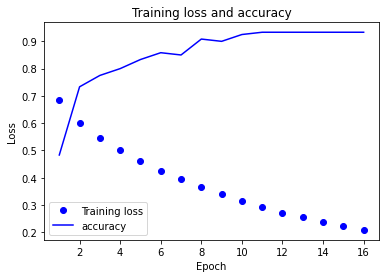

In [22]:
import matplotlib.pyplot as plt
loss_values = hist_dic["loss"]
#val_loss_values = hist_dic["val_loss"]
acc = hist_dic["accuracy"]
epochs = range(1,len(acc)+1)

plt.plot(epochs, loss_values,'bo',label = 'Training loss')
plt.plot(epochs, acc,'b',label = 'accuracy')


plt.title('Training loss and accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [26]:
predict = model.evaluate(x_test,y_test)
predict

4/4 [==============================] - 0s 3ms/step - loss: 0.2695 - accuracy: 0.9109


[0.26946136355400085, 0.9108911156654358]

In [24]:
result = model.predict(x_test)
result[11]

array([0.92518234], dtype=float32)

In [25]:
y_test[11]

1.0